In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data prepocessing

In [2]:
df = pd.read_csv('./Dataset-167_6724314644b0f.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,No,37,Travel_Rarely,408,Research & Development,19,2,Life Sciences,1,61,...,1,80,0,8,1,3,1,0,0,0
2,No,46,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,...,3,80,0,14,4,3,9,6,0,8
3,No,35,Travel_Rarely,1229,Research & Development,8,1,Life Sciences,1,63,...,4,80,0,1,2,3,1,0,0,1
4,Yes,48,Travel_Rarely,626,Research & Development,1,2,Life Sciences,1,64,...,4,80,0,23,2,3,1,0,0,0


In [4]:
df = df.replace({'Yes': 1, 'No': 0})
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,21,Travel_Frequently,251,Research & Development,10,2,Life Sciences,1,1279,...,3,80,0,2,2,1,2,2,2,2
1,0,37,Travel_Rarely,408,Research & Development,19,2,Life Sciences,1,61,...,1,80,0,8,1,3,1,0,0,0
2,0,46,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,...,3,80,0,14,4,3,9,6,0,8
3,0,35,Travel_Rarely,1229,Research & Development,8,1,Life Sciences,1,63,...,4,80,0,1,2,3,1,0,0,1
4,1,48,Travel_Rarely,626,Research & Development,1,2,Life Sciences,1,64,...,4,80,0,23,2,3,1,0,0,0


In [5]:
drop_columns = []
for k in df.keys():
    if len(df[k].unique()) == 1:
        drop_columns.append(k)
print('droped columns:',drop_columns)
df.drop(drop_columns, axis=1, inplace=True)

droped columns: ['EmployeeCount', 'Over18', 'StandardHours']


In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')


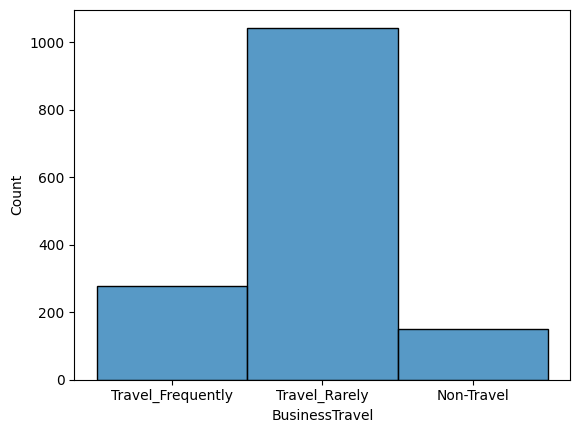

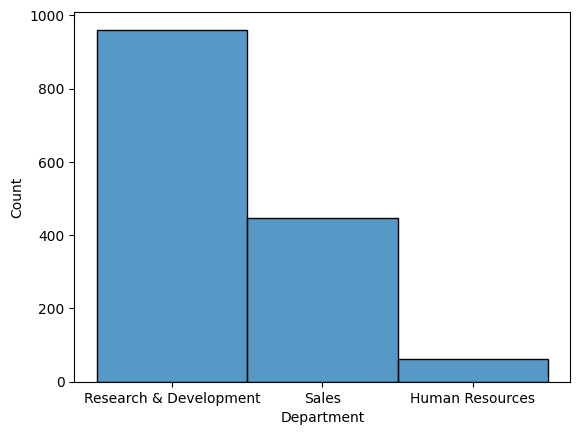

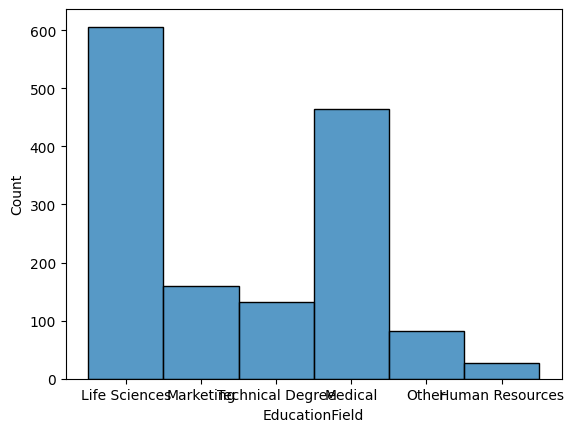

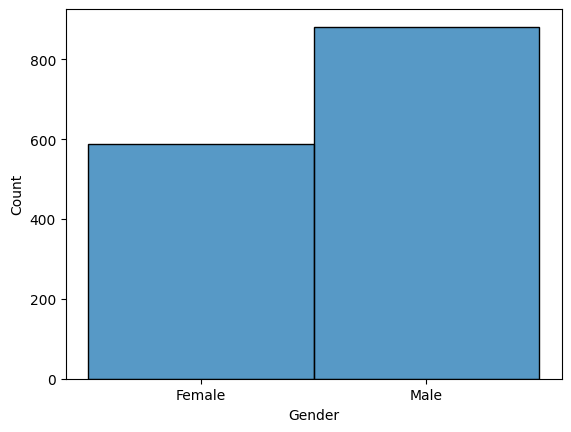

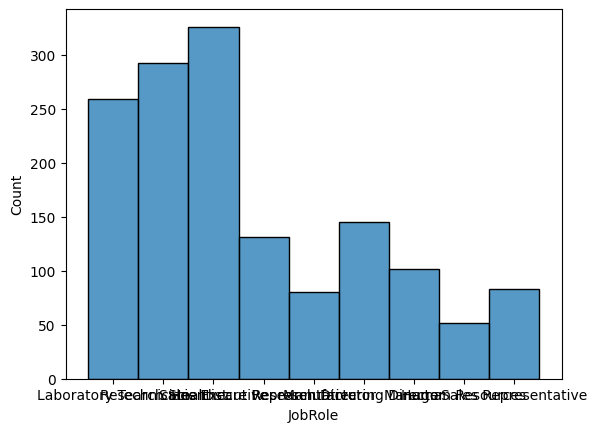

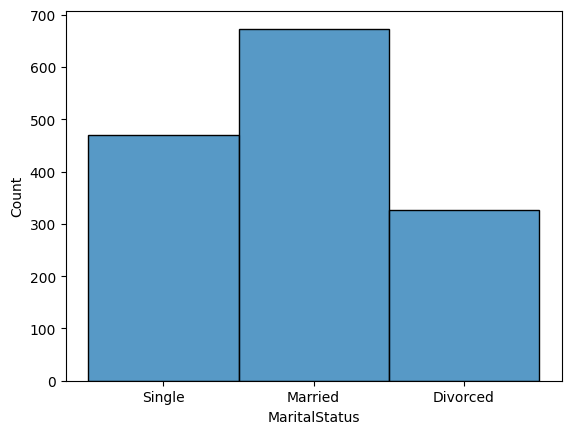

In [7]:
for k in categorical_columns:
    sns.histplot(df[k])
    plt.show()

In [8]:
for col in categorical_columns:
    dummy = pd.get_dummies(df[col], prefix=col, dtype=int, drop_first=True)
    df = pd.concat([df, dummy], axis=1)
    df.drop(col, axis=1, inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
print('Categorical columns number:',len(categorical_columns))

Categorical columns number: 0


In [9]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

# Fit the decision tree
decision_tree.fit(X, y)

# Predict the target variable
y_tree_pred = decision_tree.predict(X)

# Report the tree depth
tree_depth = decision_tree.get_depth()
print('Tree Depth:', tree_depth)

# Report the confusion matrix
tree_conf_matrix = confusion_matrix(y, y_tree_pred)
print('Confusion Matrix:\n', tree_conf_matrix)

# Perform 5-fold cross-validation
tree_scores = cross_val_score(decision_tree, X, y, cv=5)

# Print the cross-validation tree_scores
print('Cross-validation scores:', tree_scores)
print('Mean cross-validation score:', tree_scores.mean())

Tree Depth: 19
Confusion Matrix:
 [[1233    0]
 [   0  237]]
Cross-validation scores: [0.80952381 0.73129252 0.78571429 0.79931973 0.76530612]
Mean cross-validation score: 0.7782312925170067


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'max_depth': range(1,20),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        }
grid_search_cv = GridSearchCV(decision_tree, param_grid=param_grid, cv=5)
grid_search_cv.fit(X, y)

y_grid_pred = grid_search_cv.predict(X)

grid_conf_matrix = confusion_matrix(y, y_grid_pred)
print('Confusion Matrix:\n', grid_conf_matrix)
print('Best parameters:', grid_search_cv.best_params_)

grid_scores = cross_val_score(grid_search_cv, X, y, cv=5)

print('Cross-validation scores:', grid_scores)
print('Mean cross-validation score:', grid_scores.mean())

Confusion Matrix:
 [[1212   21]
 [ 189   48]]
Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation scores: [0.84013605 0.85714286 0.84353741 0.84353741 0.84013605]
Mean cross-validation score: 0.8448979591836736


In [14]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 15, 20],
        'max_features': ['sqrt', 'log2']
    }
forest = RandomForestClassifier(random_state=42)
grid_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy')
grid_forest.fit(X, y)

y_grid_forest_pred = grid_forest.predict(X)
print('Best parameters:', grid_forest.best_params_)
best_model = grid_forest.best_estimator_

feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

grid_forest_scores = cross_val_score(grid_forest, X, y, cv=5)
print('Cross-validation scores:', grid_forest_scores)
print('Mean cross-validation score:', grid_forest_scores.mean())
print('Confusion matrix:\n', confusion_matrix(y, y_grid_forest_pred))
print('Feature Importance:\n', feature_importance)

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores: [0.8537415  0.85714286 0.85714286 0.84693878 0.8537415 ]
Mean cross-validation score: 0.8537414965986395
Confusion matrix:
 [[1233    0]
 [   0  237]]

Feature Importance:
                               feature  importance
10                      MonthlyIncome    0.068246
0                                 Age    0.055902
13                           OverTime    0.050620
1                           DailyRate    0.050215
18                  TotalWorkingYears    0.047382
6                          HourlyRate    0.046264
11                        MonthlyRate    0.045887
4                      EmployeeNumber    0.045862
2                    DistanceFromHome    0.045737
21                     YearsAtCompany    0.042629
24               YearsWithCurrManager    0.033512
12                 NumCompaniesWorked    0.032369
14                  PercentSalaryHike    0.03132

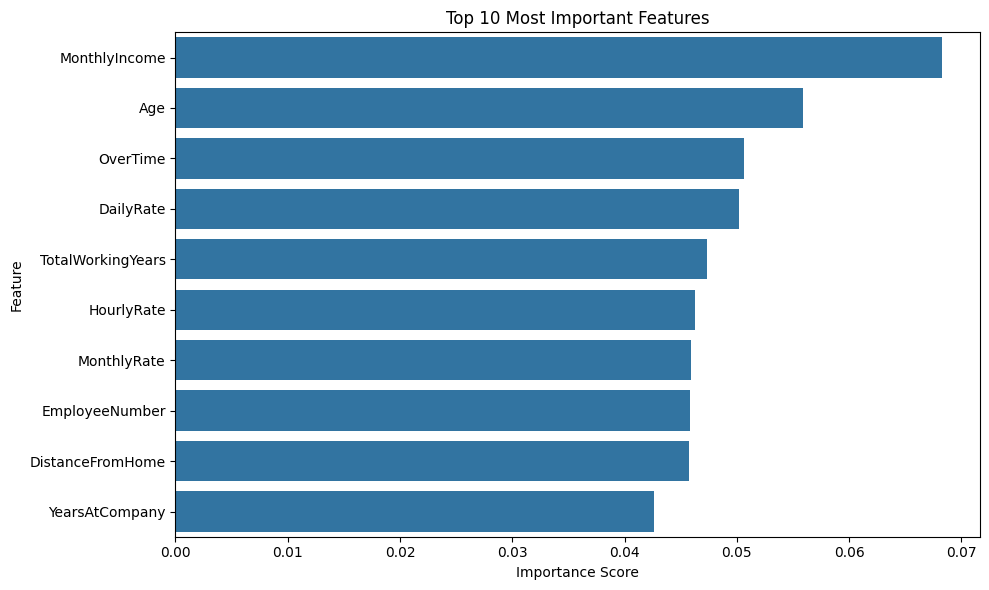

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance.head(10)
)
plt.title(f'Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Summarize score


In [18]:
print('Tree scores:', tree_scores.mean())
print('Grid scores:', grid_scores.mean())
print('Grid forest scores:', grid_forest_scores.mean())

Tree scores: 0.7782312925170067
Grid scores: 0.8448979591836736
Grid forest scores: 0.8537414965986395
